In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/Users/arnav/Downloads/car_evaluation (1).csv')

In [5]:
df.shape

(1727, 7)

In [6]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class'] #isolation.

df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [10]:
#Declare the Feature Vector & Target Variables:
X = df.drop(['class'],axis=1)
y = df['class']

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [21]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [22]:
# pip install category_encoders

In [23]:
import category_encoders as ce #This is useful only when you need to encode all the categorical data. Your dataset
# should have all the features in Categorical.

In [27]:
encoder = ce.OrdinalEncoder(cols= ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test =  encoder.transform(X_test)

In [28]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [29]:
#Import D.T Classifier:
from sklearn.tree import DecisionTreeClassifier

In [58]:
#Gini Index:

clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=1,random_state=0)

clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

[Text(334.8, 326.15999999999997, 'X[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(167.4, 108.72000000000003, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(502.20000000000005, 108.72000000000003, 'gini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]')]

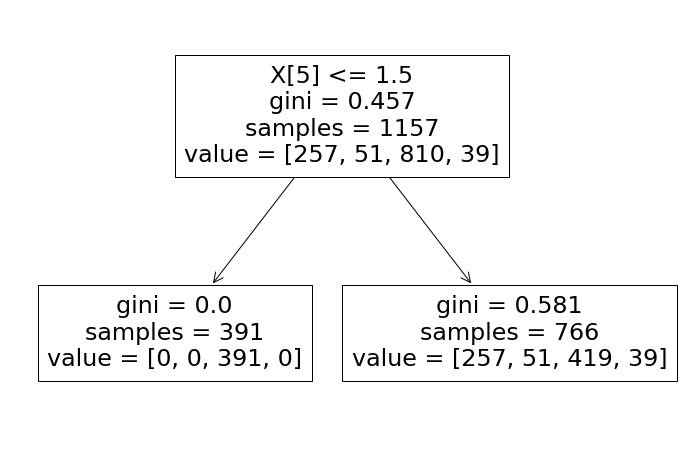

In [59]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train,y_train))

In [54]:
#D.T Enablement: (1) Information Gain (2)  Gini Index 
#Gini Index: D.T uses CART and within CART the selection measure used by it is Gini Index.
# It uses Gini Method to create split points.
# Gini index says that if 
# we randomly select two items from a 
# population, they must be of same class and prob. for this is 1 
# if the population is pure.

In [55]:
# c is your number of classes and 🕵️‍♀️ (pi) is the prob. associated with the ith class.
# Success or a failure.
# SSB: ??
# IAF: SSB: PABT: Split-Second Decisions? 

# IT creates binary splits (1 is of success and another is of failure)

In [60]:
#Predict the test set results:
y_pred_gini = clf_gini.predict(X_test)

In [61]:

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7000


In [63]:
#Traffic Sign Classification: CART | N.N: 

In [ ]:
#we will use the Kaggle Cloud 650-700mb dataset?